# Preparing the environment

## Graphics and plotting

In [75]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# general graphics settings
matplotlib.rcParams['figure.figsize'] = (10, 7)

In [2]:
import seaborn as sea

## SQL database connection

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code:

In [3]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement!

In [4]:
%sql postgresql://muesim@/s_cerevisiae

u'Connected: muesim@s_cerevisiae'

# Exploration of the Interactome *S. Cerevisiae* data set

The `y2h_union` table lists interacting proteins (by name); a pair *(proteinA, proteinB)* appears in the table if *proteinA* interacts with *proteinB*.  Note that the "interacts with" relation need not be symmetric!

This describes a *directed* graph, where the proteins are the vertices and each interaction defines an edge.

Let us have a look at the `y2h_union` table:

In [10]:
%sql select * from y2h_union limit 3;

3 rows affected.


symbol_a,symbol_b
Q0085,YCR106W
TORF1,YCR106W
TORF19,YDR361C


Alternatively, one can load the data from the `Y2H_union.tsv` file using only Python functions:

In [12]:
data = []
with open('Y2H_union.tsv', 'r') as stream:
    for line in stream:
        data.append(line.split())

In [17]:
data[:3]

[['MEL1', 'YJL092W'], ['Q0085', 'YCR106W'], ['TORF1', 'YCR106W']]

----

*Each of the following questions admit a solution using an algorithm in Python, or just an SQL query.*

Use whichever suits you best.

## 1. How can you compute the "in-degree" of a given vertex?

In [88]:
%%time
symbol_a, symbol_b = zip(*data)

def in_degree(vertex):
    ''' Computes the in-degree of a given vertex. '''
    return symbol_b.count(vertex)

print 'In-degree of the vertex {}:'.format('YCR106W'), in_degree('YCR106W')

In-degree of the vertex YCR106W: 4
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.02 ms


In [35]:
%%time
%sql SELECT COUNT(symbol_a) FROM y2h_union WHERE symbol_b = 'YCR106W'; 

1 rows affected.
CPU times: user 1.21 ms, sys: 42 µs, total: 1.25 ms
Wall time: 2.18 ms


count
4


## 2. How can you compute the "out-degree" of a given vertex?

In [63]:
%%time 

def out_degree(vertex):
    ''' Computes the out-degree of a given vertex. '''
    return symbol_a.count(vertex)

print 'Out-degree of the vertex {}:'.format('YCR106W'), out_degree('YCR106W')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 116 µs


In [45]:
%%time
%sql SELECT count(symbol_b) FROM y2h_union WHERE symbol_a = 'YCR106W'

1 rows affected.
CPU times: user 1.71 ms, sys: 0 ns, total: 1.71 ms
Wall time: 1.99 ms


count
16


## 3. How can you compute the degree (i.e., regardless of direction) of a given vertex

In [60]:
%%time 

def full_degree(vertex):
    ''' Computes the degree of a vertex regardless of the direction. '''
    return(in_degree(vertex) + out_degree(vertex))

print 'Degree of the vertex {}:'.format('YCR106W'), full_degree('YCR106W')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 245 µs


## 4. How can you compute the vertex degree distribution?

In [80]:
%%time

'''Create a set of all vertices. '''
vertices = set(symbol_a + symbol_b)

'''Get the out-degree for all vertices in that set. '''
out_degrees = np.zeros(len(vertices))
for i, v in enumerate(vertices):
    out_degrees[i] =(out_degree(v))
    
''' Compute the distribution of the out_degrees'''
counts = {}
for degree in out_degrees:
    if degree in counts:
        counts[degree] += 1
    else:
        counts[degree] = 1

{0.0: 681, 1.0: 790, 2.0: 246, 3.0: 126, 4.0: 68, 5.0: 32, 6.0: 19, 7.0: 14, 8.0: 8, 9.0: 7, 10.0: 4, 11.0: 5, 13.0: 2, 14.0: 1, 15.0: 2, 16.0: 1, 17.0: 1, 19.0: 1, 21.0: 1, 22.0: 1, 25.0: 1, 26.0: 2, 28.0: 1, 29.0: 1, 31.0: 1, 36.0: 1, 38.0: 1}
CPU times: user 190 ms, sys: 0 ns, total: 190 ms
Wall time: 188 ms


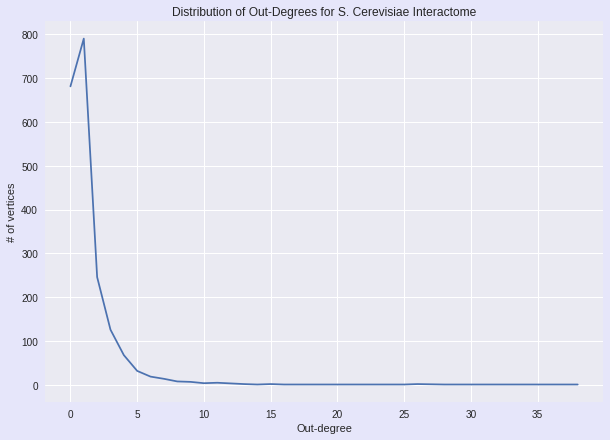

In [84]:
xarr = np.array(counts.keys())
yarr = np.array(counts.values())
plt.figure(facecolor='lavender')
plt.xlabel('Out-degree')
plt.ylabel('# of vertices')
plt.title('Distribution of Out-Degrees for S. Cerevisiae Interactome')
plt.plot(xarr, yarr)

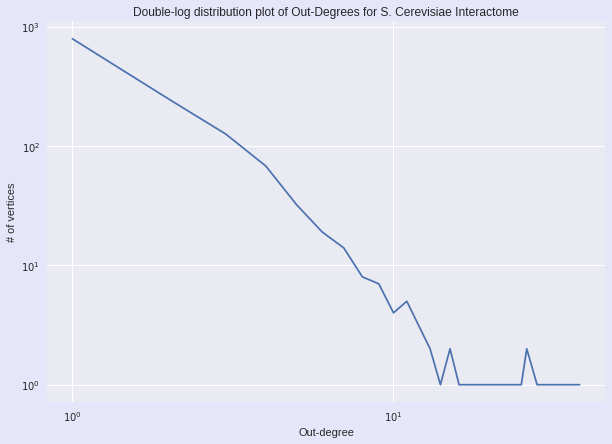

In [90]:
plt.figure(facecolor='lavender')
plt.xlabel('Out-degree')
plt.ylabel('# of vertices')
plt.title('Double-log distribution plot of Out-Degrees for S. Cerevisiae Interactome')
plt.loglog(xarr, yarr)